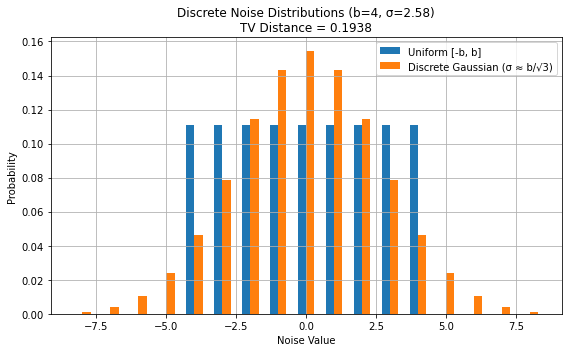

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import rv_discrete
from scipy.stats import entropy

# Set parameters
b = 4  # Uniform noise range: [-b, ..., b]
#sigma = b / np.sqrt(3)  # Match variance
sigma = np.sqrt((b + b**2)/3)  # Match variance

# Discrete domain
domain = np.arange(-b-4, b+5)

# Uniform distribution on [-b, b]
uniform_probs = np.array([1 / (2*b + 1) if abs(x) <= b else 0 for x in domain])

# Discrete Gaussian distribution
gaussian_unnorm = np.exp(-np.square(domain) / (2 * sigma**2))
gaussian_probs = gaussian_unnorm / gaussian_unnorm.sum()  # Normalize

# Total variation distance
tvd = 0.5 * np.sum(np.abs(uniform_probs - gaussian_probs))

# Plot
plt.figure(figsize=(8, 5))
plt.bar(domain - 0.15, uniform_probs, width=0.3, label='Uniform [-b, b]')
plt.bar(domain + 0.15, gaussian_probs, width=0.3, label='Discrete Gaussian (σ ≈ b/√3)')
plt.xlabel('Noise Value')
plt.ylabel('Probability')
plt.title(f'Discrete Noise Distributions (b={b}, σ={sigma:.2f})\nTV Distance = {tvd:.4f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
tvds = []
max_bound = 2**13
for b in range(2,max_bound+1):
    sigma = np.sqrt((b + b**2)/3)
    # Discrete domain
    domain = np.arange(-b-4, b+5)
    # Uniform distribution on [-b, b]
    uniform_probs = np.array([1 / (2*b + 1) if abs(x) <= b else 0 for x in domain])

    # Discrete Gaussian distribution
    gaussian_unnorm = np.exp(-np.square(domain) / (2 * sigma**2))
    gaussian_probs = gaussian_unnorm / gaussian_unnorm.sum()  # Normalize

    # Total variation distance
    tvd = 0.5 * np.sum(np.abs(uniform_probs - gaussian_probs))
    tvds.append((b,sigma,tvd))
    
    #print(f"bound: {b}\tsd: {round(sigma,4)}\tTVD: {tvd}")

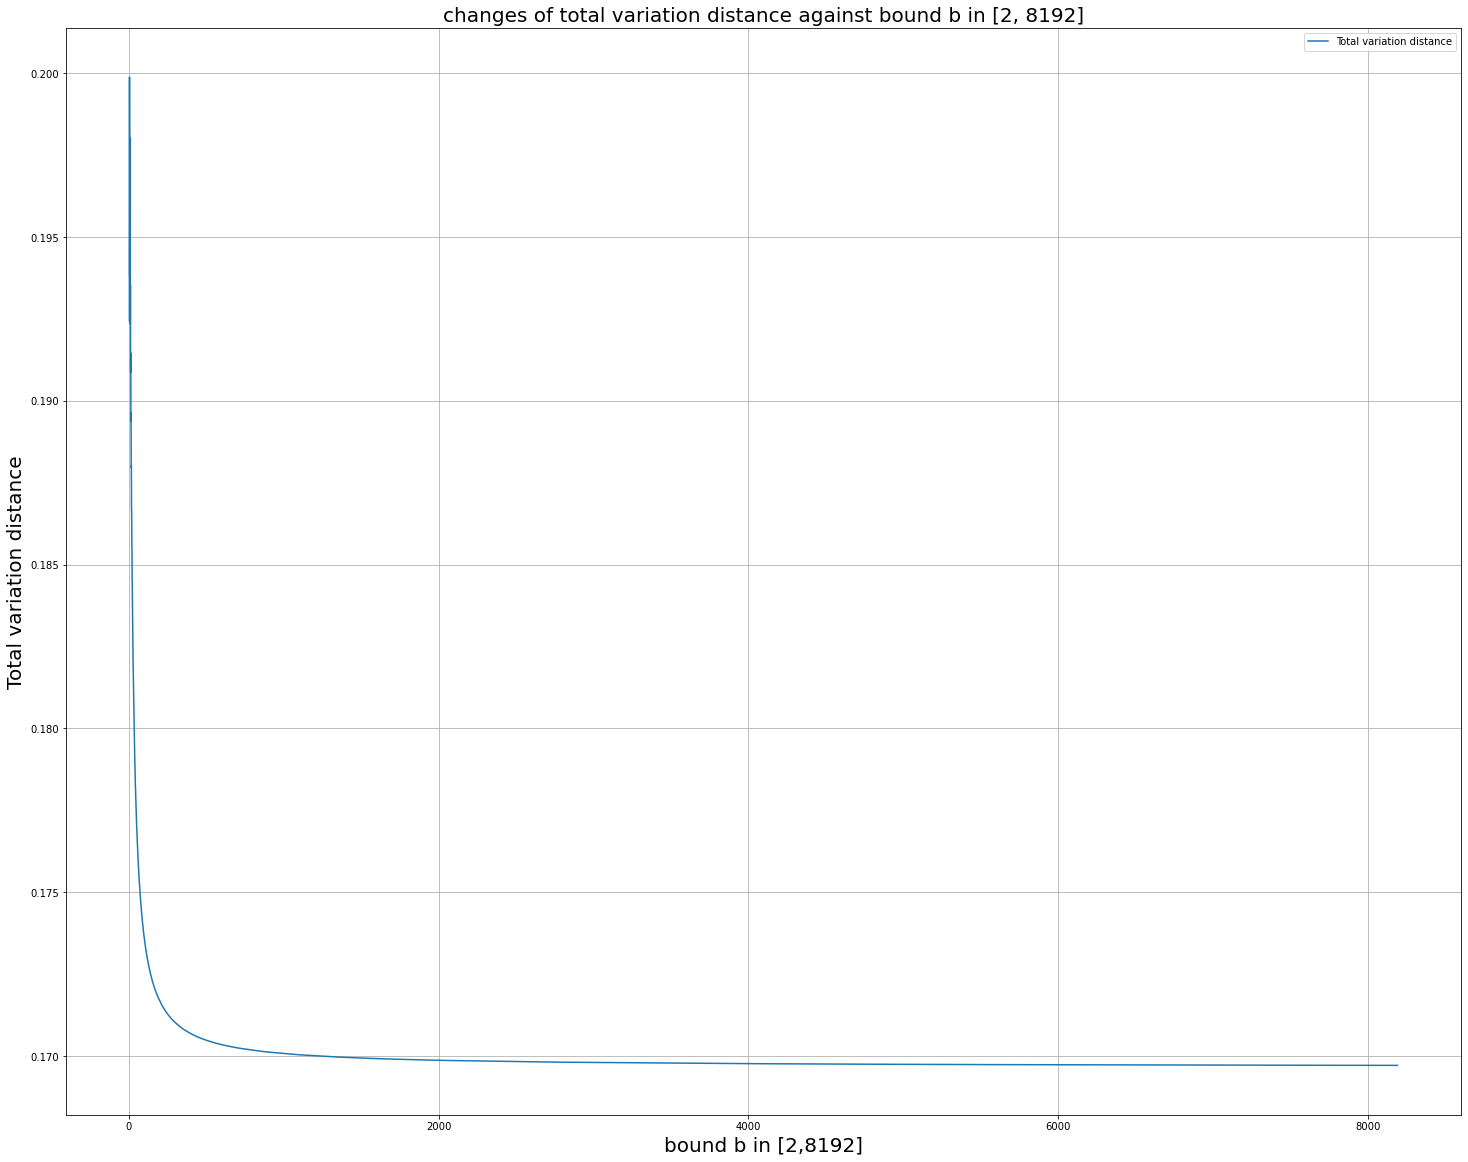

In [65]:
# Unpack the tuples into separate lists
x = [t[0] for t in tvds]
y1 = [t[1] for t in tvds]
y2 = [t[2] for t in tvds]

# Plot the data
plt.figure(figsize=(25, 20))
#plt.plot(x, y1, marker='o', label ='standard deviation')
#plt.plot(x, y2, marker='*', label = 'Total variation distance')
plt.plot(x, y2, label = 'Total variation distance')
# Increase number of x ticks
#plt.xticks(np.linspace(min(x), max(x), num=20))
# One tick per x-value
#plt.xticks(x)
plt.title(f"changes of total variation distance against bound b in [{2}, {max_bound}]",fontsize=20)
plt.xlabel(f"bound b in [{2},{max_bound}]",fontsize=20)
plt.ylabel("Total variation distance",fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

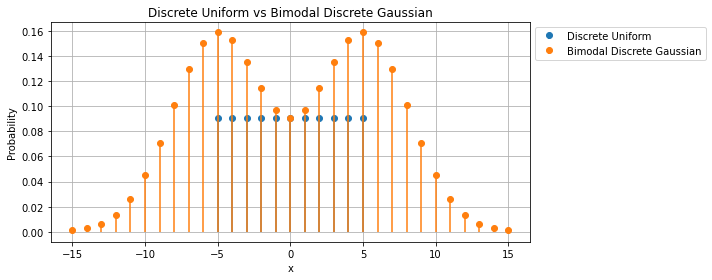

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

b = 5

# One-line standard deviation function
sd = lambda b: ((b**2 + b) / 3) ** 0.5

# Parameters for two Gaussian modes
mean1, std1 = -b, sd(b)
mean2, std2 = b, sd(b)

# Discrete x values for bimodal Gaussian
x_bimodal = np.arange(-15, 16)
gauss1 = norm.pdf(x_bimodal, loc=mean1, scale=std1)
gauss2 = norm.pdf(x_bimodal, loc=mean2, scale=std2)
bimodal = gauss1 + gauss2
bimodal /= np.sum(bimodal)  # Normalize

bimodal *= 2.5  # Scale up to make it stand above the uniform plot


# Discrete x values for uniform distribution
x_uniform = np.arange(-5, 6)
p_uniform = np.ones_like(x_uniform) / len(x_uniform)

# Set larger figure size
plt.figure(figsize=(10, 4))

# Plot both
plt.stem(x_uniform, p_uniform, linefmt='C0-', markerfmt='C0o', basefmt=" ", label="Discrete Uniform", use_line_collection=True)
plt.stem(x_bimodal, bimodal, linefmt='C1-', markerfmt='C1o', basefmt=" ", label="Bimodal Discrete Gaussian", use_line_collection=True)

plt.title('Discrete Uniform vs Bimodal Discrete Gaussian')
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)

# Place legend outside top-right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


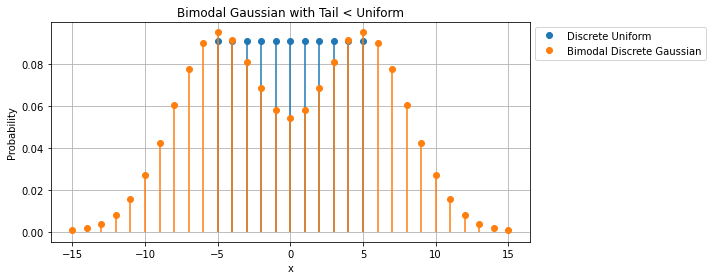

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

b = 5
sd = lambda b: ((b**2 + b) / 3) ** 0.5

mean1, std1 = -b, sd(b)
mean2, std2 = b, sd(b)

x_bimodal = np.arange(-15, 16)
gauss1 = norm.pdf(x_bimodal, loc=mean1, scale=std1)
gauss2 = norm.pdf(x_bimodal, loc=mean2, scale=std2)
bimodal = gauss1 + gauss2
bimodal /= np.sum(bimodal)  # normalize

# Uniform distribution over [-5, 5]
x_uniform = np.arange(-5, 6)
p_uniform = np.ones_like(x_uniform) / len(x_uniform)  # 1/11

# Find max of bimodal outside [-b, b]
mask_outside = (x_bimodal < -b) | (x_bimodal > b)
max_outside = np.max(bimodal[mask_outside])

# Ensure max_outside < uniform value (1/11 ≈ 0.0909)
scaling_factor = (1/11) / max_outside * 0.99  # multiply by 0.99 to stay safely under

bimodal *= scaling_factor  # scale down entire distribution

# Plot
plt.figure(figsize=(10, 4))
plt.stem(x_uniform, p_uniform, linefmt='C0-', markerfmt='C0o', basefmt=" ", label="Discrete Uniform", use_line_collection=True)
plt.stem(x_bimodal, bimodal, linefmt='C1-', markerfmt='C1o', basefmt=" ", label="Bimodal Discrete Gaussian", use_line_collection=True)

plt.title('Bimodal Gaussian with Tail < Uniform')
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

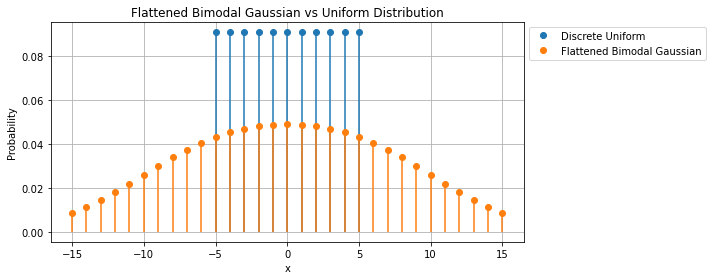

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

b = 5
x = np.arange(-15, 16)

# Artificially increase std to flatten middle
large_std = 6  # Larger than sd(b)

# Two overlapping Gaussians centered at ±b
gauss1 = norm.pdf(x, loc=-b, scale=large_std)
gauss2 = norm.pdf(x, loc= b, scale=large_std)

bimodal_flat = gauss1 + gauss2
bimodal_flat /= np.sum(bimodal_flat)  # Normalize to make it a probability distribution

# Uniform distribution over [-5, 5]
x_uniform = np.arange(-5, 6)
p_uniform = np.ones_like(x_uniform) / len(x_uniform)

# Plot
plt.figure(figsize=(10, 4))
plt.stem(x_uniform, p_uniform, linefmt='C0-', markerfmt='C0o', basefmt=" ", label="Discrete Uniform", use_line_collection=True)
plt.stem(x, bimodal_flat, linefmt='C1-', markerfmt='C1o', basefmt=" ", label="Flattened Bimodal Gaussian", use_line_collection=True)

plt.title('Flattened Bimodal Gaussian vs Uniform Distribution')
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


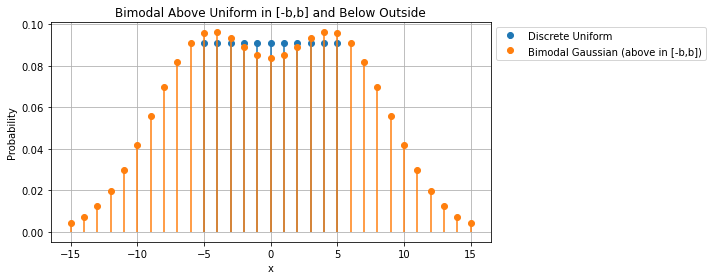

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
b = 5
x = np.arange(-15, 16)
uniform_value = 1 / (2 * b + 1)

# Define standard deviation (spread controls flatness inside [-b, b])
std = 4  # Wider Gaussian for flatter center

# Bimodal Gaussian
gauss1 = norm.pdf(x, loc=-b, scale=std)
gauss2 = norm.pdf(x, loc= b, scale=std)
bimodal = gauss1 + gauss2

# Normalize bimodal
bimodal /= np.sum(bimodal)

# Step 1: Identify max value outside [-b, b]
mask_outside = (x < -b) | (x > b)
max_outside = np.max(bimodal[mask_outside])

# Step 2: Compute a scaling factor so outside values stay < uniform
scale = (uniform_value / max_outside) * 0.9999 # slightly below

# Apply scaling
bimodal *= scale

# Now some values inside [-b, b] will be slightly > uniform
# For comparison: Uniform distribution over [-b, b]
x_uniform = np.arange(-b, b + 1)
p_uniform = np.ones_like(x_uniform) * uniform_value

# Plot
plt.figure(figsize=(10, 4))

# Plot uniform
plt.stem(x_uniform, p_uniform, linefmt='C0-', markerfmt='C0o',
         basefmt=" ", label="Discrete Uniform", use_line_collection=True)

# Plot bimodal
plt.stem(x, bimodal, linefmt='C1-', markerfmt='C1o',
         basefmt=" ", label="Bimodal Gaussian (above in [-b,b])", use_line_collection=True)

plt.title('Bimodal Above Uniform in [-b,b] and Below Outside')
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()